In [3]:
import torch
from torch import nn
import torchvision
from torchvision.transforms import ToTensor, Resize, Compose, Normalize
from torchvision.datasets import CIFAR10, ImageNet
from timm.models import create_model, apply_test_time_pool, load_checkpoint, is_model, list_models
from timm.data import Dataset, DatasetTar, create_loader, resolve_data_config, RealLabelsImagenet, create_transform
from torch.utils.data import DataLoader, Subset
import os
import sys
import argparse
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
import numpy as np

In [5]:
model = create_model('vit_base_patch16_224', pretrained=True)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-vitjx/jx_vit_base_p16_224-80ecf9dd.pth" to /home/ameya/.cache/torch/hub/checkpoints/jx_vit_base_p16_224-80ecf9dd.pth


In [6]:
config = resolve_data_config({}, model=model)

In [8]:
transforms = create_transform(**config)

In [58]:
transforms

Compose(
    Resize(size=248, interpolation=PIL.Image.BICUBIC)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=tensor([0.5000, 0.5000, 0.5000]), std=tensor([0.5000, 0.5000, 0.5000]))
)

In [59]:
ds = ImageNet('/data/datasets/ImageNet/val', split='val')#, transform=transforms)

In [60]:
indices = np.load('imagenet_indices.npy')

In [61]:
ds_sub = Subset(ds, indices)

In [62]:
labels = []
for idx in indices:
    labels.append(ds_sub.dataset[idx][1])

In [63]:
import pandas as pd

In [49]:
from matplotlib import pyplot as plt

In [64]:
img = ds_sub.dataset[0][0]

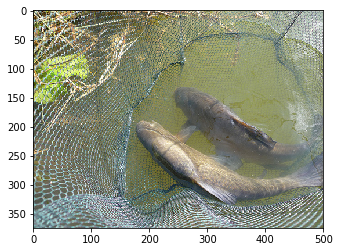

In [68]:
plt.imshow(np.array(img))

In [55]:
img_np_2 = (img_np - img_np.min())/img_np.ptp()

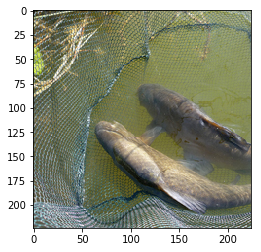

In [56]:
plt.imshow(img_np_2)